* This code implement a classifier for the with or without beard images 
* Each image in the training data or in the test data is passed through a face detector which extract only the face from the image which make the classificcation is more effecient as we concentrate on the details of the face itself.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.neighbors import KNeighborsClassifier
# activation of face detector module
cascPath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascPath)


In [2]:
train=[]
train_labels=[]
# adding images without beard to the training data carrying label 0
for count in range(100):
    temp= ("Faces_without/"+str((count+1))+".jpg")
    image=cv2.imread(temp)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Detect faces in the image
    faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE)
# extract face only
    for (x,y,w,h) in faces:
        #cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
        gray = gray[y:y+h, x:x+w]
        image = image[y:y+h+10, x:x+w]
        
#get image histogram and put it in training data
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, (8, 8, 8),[0, 180, 0, 256, 0, 256])
    hist = cv2.normalize(hist,hist)
    hist=hist.flatten()
    train.append(hist)
    train_labels.append(0)

############################################################################
# adding images with beard to the training data carrying label 1

for count in range(100):
    temp= ("Faces_with/"+str((count+1))+".jpg")
    image=cv2.imread(temp)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Detect faces in the image
    faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE)
# extract face only
    for (x,y,w,h) in faces:
        #cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
        gray = gray[y:y+h, x:x+w]
        image = image[y:y+h+10, x:x+w]
        #plt.imshow(image)
        #plt.show()
#get image histogram and put it in training data
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, (8, 8, 8),[0, 180, 0, 256, 0, 256])
    hist = cv2.normalize(hist,hist)
    hist=hist.flatten()
    train.append(hist)
    train_labels.append(1)


In [3]:
print(len(train_labels))

200


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(train, train_labels)
acc_decision_tree = round(clf.score(train, train_labels)*100)
print (acc_decision_tree)

In [12]:
# prediction
test=[]
image=cv2.imread("image1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Detect faces in the image
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE)
# extract face only
for (x,y,w,h) in faces:
    gray = gray[y:y+h, x:x+w]
    image = image[y:y+h+10, x:x+w]
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hist = cv2.calcHist([hsv], [0, 1, 2], None, (8, 8, 8),[0, 180, 0, 256, 0, 256])
hist = cv2.normalize(hist,hist)
hist=hist.flatten()
test.append(hist)


In [18]:
def predict(img):
    image=cv2.imread(img)
    plt.imshow(image)
    plt.show()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Detect faces in the image
    faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE)
# extract face only
    for (x,y,w,h) in faces:
        gray = gray[y:y+h, x:x+w]
        image = image[y:y+h+10, x:x+w]
        plt.imshow(image)
        plt.show()
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, (8, 8, 8),[0, 180, 0, 256, 0, 256])
    hist = cv2.normalize(hist,hist)
    hist=hist.flatten()
    test.append(hist)
    y_pred_decision_tree = clf.predict(test)
    if(y_pred_decision_tree[len(y_pred_decision_tree)-1]==1):
        print("image has beard")
    else:
        print("image with no beard")

    

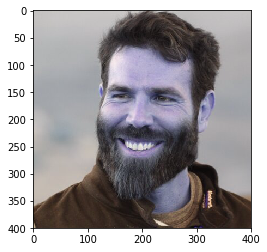

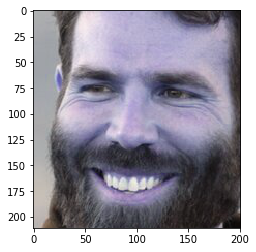

image has beard


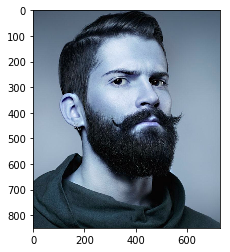

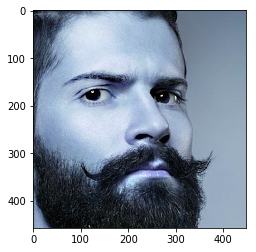

image has beard


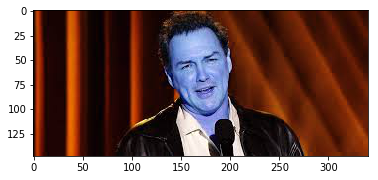

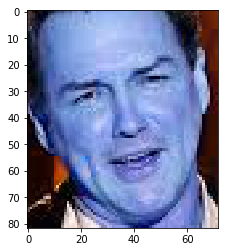

image with no beard


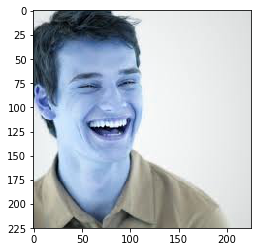

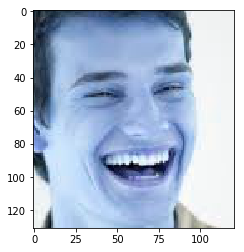

image with no beard


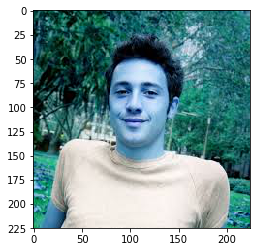

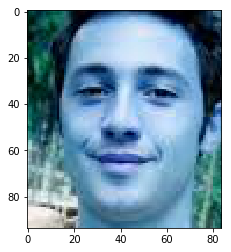

image with no beard


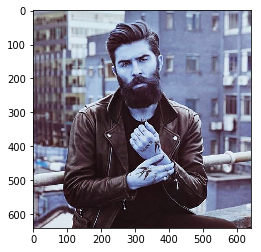

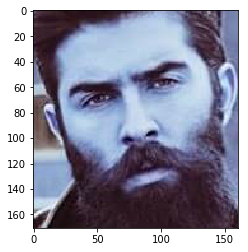

image has beard


In [21]:
img="image2.jpg"
predict(img)
img="image3.jpg"
predict(img)
img="image4.jpg"
predict(img)
img="image5.jpg"
predict(img)
img="image6.jpg"
predict(img)
img="image7.jpg"
predict(img)